## 9장. 케라스2 응용
실제 문제에 인공지능을 활용할 때 생기는 문제들을 효율적으로 처리하는 케라스의 응용 기능을 알아봅시다.

### 9.2 미리 학습한 모델 사용하기
학습 데이터가 많지 않을 때 성능을 높이는 또 다른 방법은 기존에 미리 학습한 모델을 활용하는 겁니다.

In [5]:
# set to use CPU
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

### 9.1.1 응용 코드
#### 9.1.1.1 응용 코드를 위한 패키지 임포트

In [2]:
#from keras import datasets
#import keras
#from keraspp import aigen
from sklearn import model_selection
from tensorflow.keras import datasets
from tensorflow import keras
assert keras.backend.image_data_format() == 'channels_last'
from keraspp import aigen

#### 9.1.1.2 머쉰 클래스 상속하여 데이터 지정

In [3]:
class Machine(aigen.Machine_Generator):
    def __init__(self):
        (x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
        _, X, _, y = model_selection.train_test_split(x_train, y_train, test_size=0.02)
        X = X.astype(float)

        gen_param_dict = {'rotation_range': 10}

        super().__init__(X, y, nb_classes=10, gen_param_dict=gen_param_dict)

(800, 32, 32, 3) (800, 1)
X_train shape: (800, 32, 32, 3)
800 train samples
200 test samples
data.input_shape (32, 32, 3)
(800, 32, 32, 3)
Instructions for updating:
Please use Model.fit, which supports generators.


2021-11-03 00:04:22.376043: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-11-03 00:04:22.689378: E tensorflow/stream_executor/cuda/cuda_driver.cc:313] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-11-03 00:04:22.689514: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (SJKIM-Home): /proc/driver/nvidia/version does not exist
2021-11-03 00:04:22.691434: I tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
2021-11-03 00:04:22.697866: I tensorflow/core/platform/profile_utils/cpu_utils.cc:102] CPU Frequency: 3599995000 Hz
2021-11-03 00:04:22.699723: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55b0fef499f0 initialized for platform Host (this does not guarantee that XLA will be used). Devi

Epoch 1/100
10/10 [==============================] - 2s 152ms/step - loss: 2.3012 - accuracy: 0.1039 - val_loss: 2.3074 - val_accuracy: 0.0700
Epoch 2/100
10/10 [==============================] - 1s 132ms/step - loss: 2.3017 - accuracy: 0.1098 - val_loss: 2.3072 - val_accuracy: 0.0700
Epoch 3/100
10/10 [==============================] - 1s 136ms/step - loss: 2.3027 - accuracy: 0.0947 - val_loss: 2.3069 - val_accuracy: 0.0650
Epoch 4/100
10/10 [==============================] - 1s 133ms/step - loss: 2.3037 - accuracy: 0.1081 - val_loss: 2.3067 - val_accuracy: 0.0650
Epoch 5/100
10/10 [==============================] - 1s 128ms/step - loss: 2.3030 - accuracy: 0.0974 - val_loss: 2.3065 - val_accuracy: 0.0750
Epoch 6/100
10/10 [==============================] - 1s 135ms/step - loss: 2.3024 - accuracy: 0.1005 - val_loss: 2.3063 - val_accuracy: 0.0750
Epoch 7/100
10/10 [==============================] - 1s 131ms/step - loss: 2.3026 - accuracy: 0.0928 - val_loss: 2.3060 - val_accuracy: 0.0750

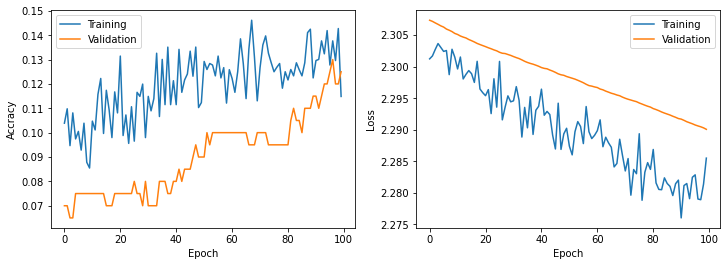

In [4]:
def main():
    m = Machine()
    m.run()

main()

---
### 8.2.6 전체 코드

In [6]:
"""
CH 9.2 Pretrained Method
"""
from sklearn import model_selection
from keras import datasets
import keras
assert keras.backend.image_data_format() == 'channels_last'

from keraspp import aiprt


class Machine(aiprt.Machine_Generator):
    def __init__(self):
        (x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
        _, X, _, y = model_selection.train_test_split(x_train, y_train, test_size=0.02)
        X = X.astype(float)

        # gen_param_dict = {'rotation_range': 10}

        super().__init__(X, y, nb_classes=10)


def main():
    m = Machine()
    m.run()

main()

AttributeError: module 'keras.backend' has no attribute 'image_dim_ordering'